In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from ABCD_dnn_grid import sample3d, testABCDrate

In [2]:
cr_raw = np.load('data/htpt_3d_40to100.npy') #load histogram

In [3]:
signal = (cr_raw[:,0]>0.3)&(cr_raw[:,1]>0.3)&(cr_raw[:,2]>0.3)
crlist = cr_raw[np.invert(signal)]

In [4]:
binsize = 6
htpt = cr_raw.T[3].reshape((binsize, binsize, 6))

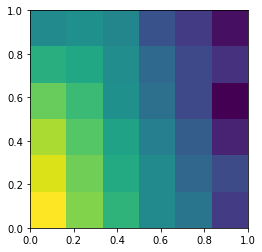

In [5]:
plt.imshow(htpt[0], norm=colors.LogNorm(), origin='lower', extent = [0,1,0,1])

In [6]:
def trainEnsemble(crlist, shape, nrepeat, ctrl_bins, verbose=1):
    grid = np.zeros(shape)
    grid_std = np.zeros(shape)
    count = np.zeros(nrepeat)

    for i in range(nrepeat):
        model = testABCDrate(crlist)
        grid_i, grid_std_i = sample3d(model, shape)
        grid += grid_i
        grid_std += grid_std_i**2
        count[i] = grid_i[ctrl_bins[0]:,ctrl_bins[1]:, ctrl_bins[2]:].sum()
        
        if verbose==1: print(f'{i}-th training complete')
    
    return count, grid/nrepeat, np.sqrt(grid_std)/nrepeat

In [12]:
nrepeat = 50

with tf.device('CPU:0'):
    count, grid, grid_std = trainEnsemble(crlist, [6,6,6], nrepeat, [2,2,2])

0-th training complete
1-th training complete
2-th training complete
3-th training complete
4-th training complete
5-th training complete
6-th training complete
7-th training complete
8-th training complete
9-th training complete
10-th training complete
11-th training complete
12-th training complete
13-th training complete
14-th training complete
15-th training complete
16-th training complete
17-th training complete
18-th training complete
19-th training complete
20-th training complete
21-th training complete
22-th training complete
23-th training complete
24-th training complete
25-th training complete
26-th training complete
27-th training complete
28-th training complete
29-th training complete
30-th training complete
31-th training complete
32-th training complete
33-th training complete
34-th training complete
35-th training complete
36-th training complete
37-th training complete
38-th training complete
39-th training complete
40-th training complete
41-th training complete
42

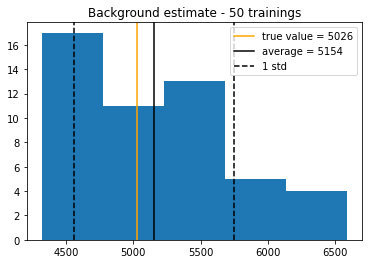

In [68]:
bknd_true = htpt[2:, 2:, 2:].sum()
avg = count.mean()
std = np.std(count)
plt.hist(count, bins=5)
plt.axvline(bknd_true, color='orange', label=f'true value = {bknd_true:.0f}')
plt.axvline(avg, color='black', label=f'average = {avg:.0f}')
plt.axvline(avg+std, color='black', ls='--', label=f'1 std')
plt.axvline(avg-std, color='black', ls='--')
plt.legend()
plt.title(f'Background estimate - {nrepeat} trainings')
plt.savefig('figures/bknd_count_nn.png', dpi=200)

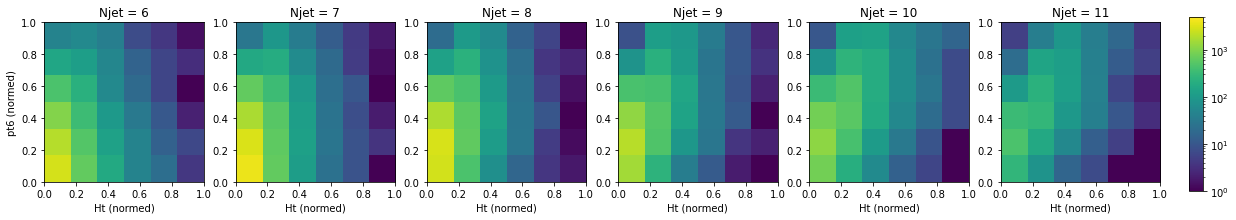

In [91]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(htpt[i], norm=colors.LogNorm(vmax = 5e3), origin='lower', extent = [0,1,0,1])
    ax[i].set_xlabel('Ht (normed)')
    ax[i].set_title(f'Njet = {i+6}')

ax[0].set_ylabel('pt6 (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
plt.savefig('figures/bknd_true.png', dpi=200)

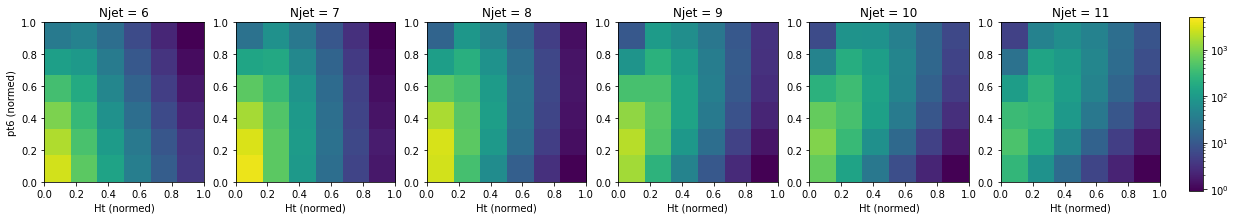

In [90]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(grid[i], norm=colors.LogNorm(vmax = 5e3), origin='lower', extent = [0,1,0,1])
    ax[i].set_xlabel('Ht (normed)')
    ax[i].set_title(f'Njet = {i+6}')

ax[0].set_ylabel('pt6 (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
plt.savefig('figures/bknd_nn.png', dpi=200)

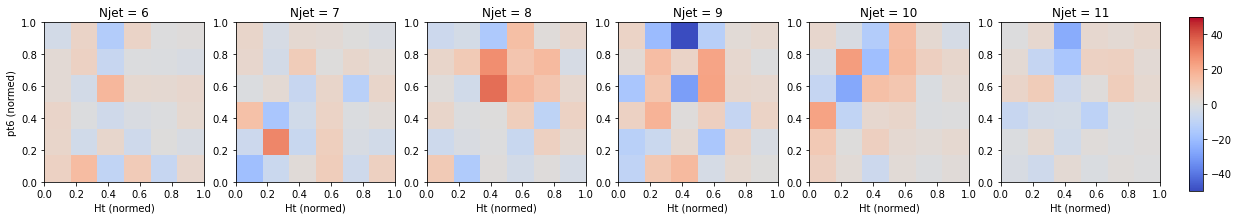

In [98]:
fig,ax = plt.subplots(1, 6, figsize=(20, 3.5))
for i in range(6):
    im = ax[i].imshow(grid[i]-htpt[i], cmap='coolwarm', origin='lower', extent = [0,1,0,1], vmin = -50, vmax = 50)
    ax[i].set_xlabel('Ht (normed)')
    ax[i].set_title(f'Njet = {i+6}')

ax[0].set_ylabel('pt6 (normed)')
cb_ax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
cbar = fig.colorbar(im, cax=cb_ax)
plt.savefig('figures/bknd_nn_error.png', dpi=200)